In [1]:
!pip install transformers

In [2]:
from transformers import DPRQuestionEncoder, DPRQuestionEncoderTokenizer

In [3]:
tokenizer = DPRQuestionEncoderTokenizer.from_pretrained("facebook/dpr-question_encoder-single-nq-base")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

In [4]:
model = DPRQuestionEncoder.from_pretrained("facebook/dpr-question_encoder-single-nq-base")

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.bias', 'question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
input_ids = tokenizer("Hello, is my dog cute ?", return_tensors="pt")["input_ids"]

In [6]:
embeddings = model(input_ids).pooler_output

In [7]:
embeddings

tensor([[ 3.2363e-02,  1.2753e-01,  1.6819e-01,  2.7976e-03,  3.8969e-01,
          2.4265e-01,  2.1790e-01, -2.3352e-02, -8.4820e-02, -1.4324e-01,
         -4.6391e-01, -7.3888e-02, -2.6837e-01, -2.5854e-01, -3.9385e-01,
         -4.6203e-02,  4.6797e-02,  2.9801e-01, -7.3548e-02,  1.9216e-01,
         -9.2044e-02, -3.9324e-01, -4.1118e-01, -5.0958e-01,  1.7611e-01,
          1.4473e-01,  1.2819e-01,  3.6131e-01, -3.7362e-01, -4.8173e-02,
         -1.3587e-01, -2.2887e-01,  4.0440e-01, -2.7060e-01, -1.5117e-01,
          1.1219e-01, -1.0912e-01, -1.8131e-01, -2.0688e-01,  3.5515e-01,
          2.4943e-01,  1.4510e-01,  1.9775e-01, -4.0816e-02, -2.7108e-01,
         -1.0122e-01, -7.1524e-01,  1.9005e-01,  4.7088e-01, -1.7366e-01,
          5.3381e-02,  2.5160e-01,  1.4066e-02, -5.7960e-02, -9.5530e-02,
          1.0499e-01,  2.2886e-02, -3.8995e-01,  8.1244e-03, -5.6475e-02,
          2.6910e-02,  6.4864e-02,  2.2938e-01,  5.1145e-02, -4.0683e-01,
          5.7723e-01,  1.0041e-01,  9.

In [8]:
embeddings.shape

torch.Size([1, 768])

In [11]:
import matplotlib.pyplot as plt
import torch
import numpy as np


tensor_array = embeddings[0].detach().numpy()


def vis(tensor_array):
  plt.figure(figsize=(12, 6))
  plt.plot(tensor_array, linewidth=1)
  plt.title('Tensor Values Line Plot')
  plt.xlabel('Index')
  plt.ylabel('Value')
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()

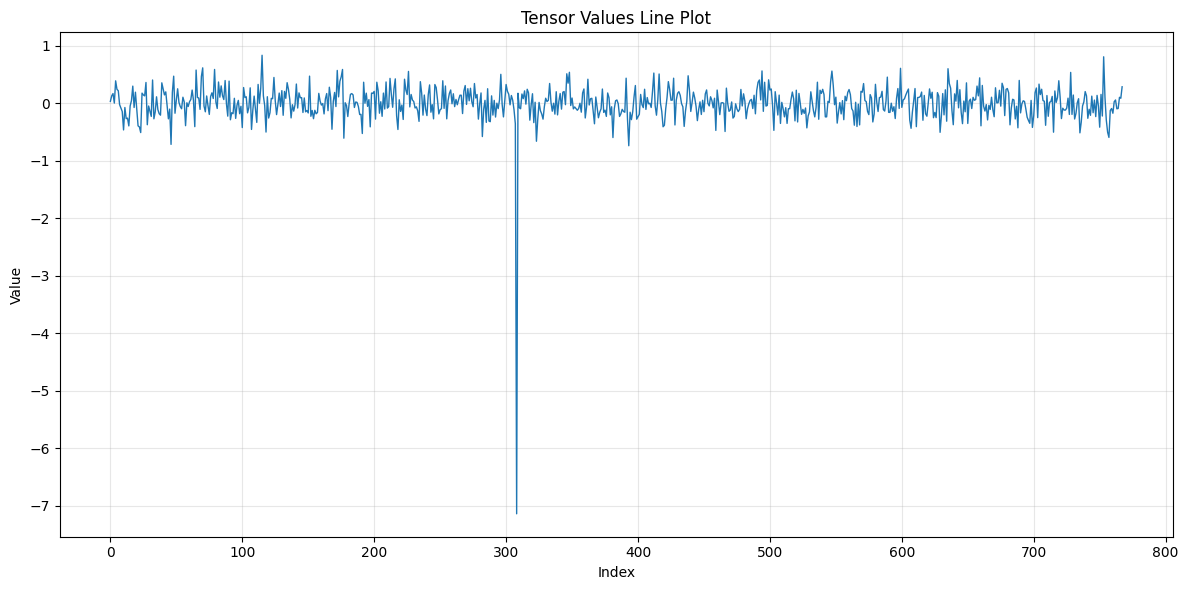

In [12]:
vis(tensor_array)

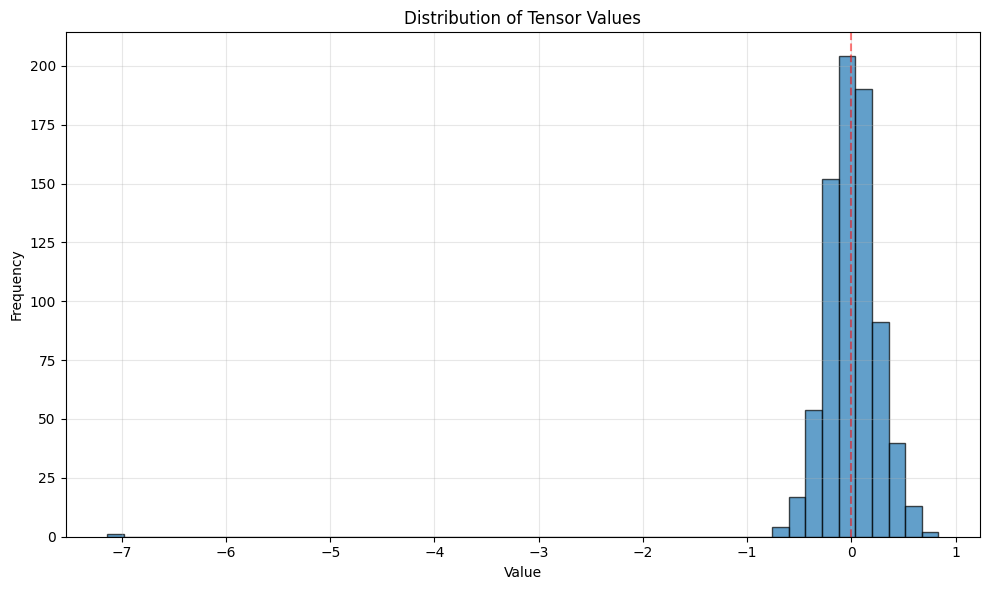

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(tensor_array, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Tensor Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

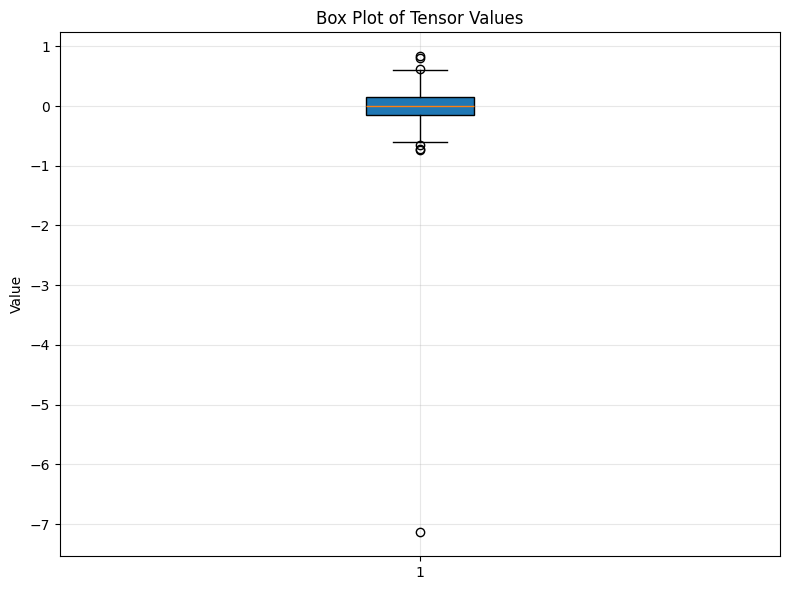

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(tensor_array, vert=True, patch_artist=True)
plt.title('Box Plot of Tensor Values')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

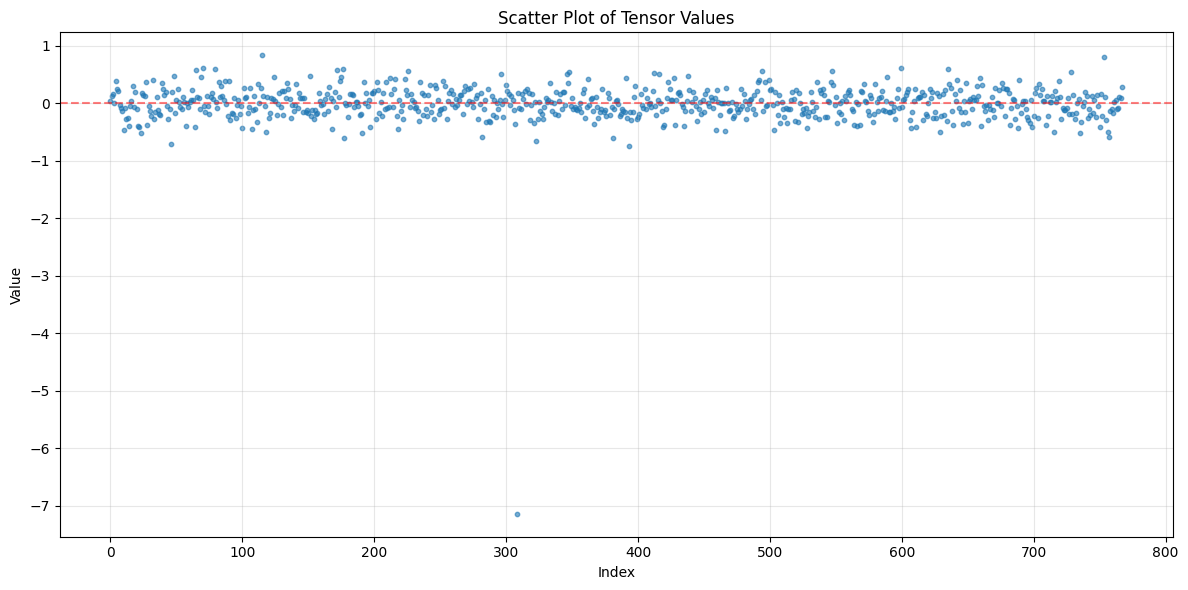

In [21]:
plt.figure(figsize=(12, 6))
indices = np.arange(len(tensor_array))
plt.scatter(indices, tensor_array, alpha=0.6, s=10)
plt.title('Scatter Plot of Tensor Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

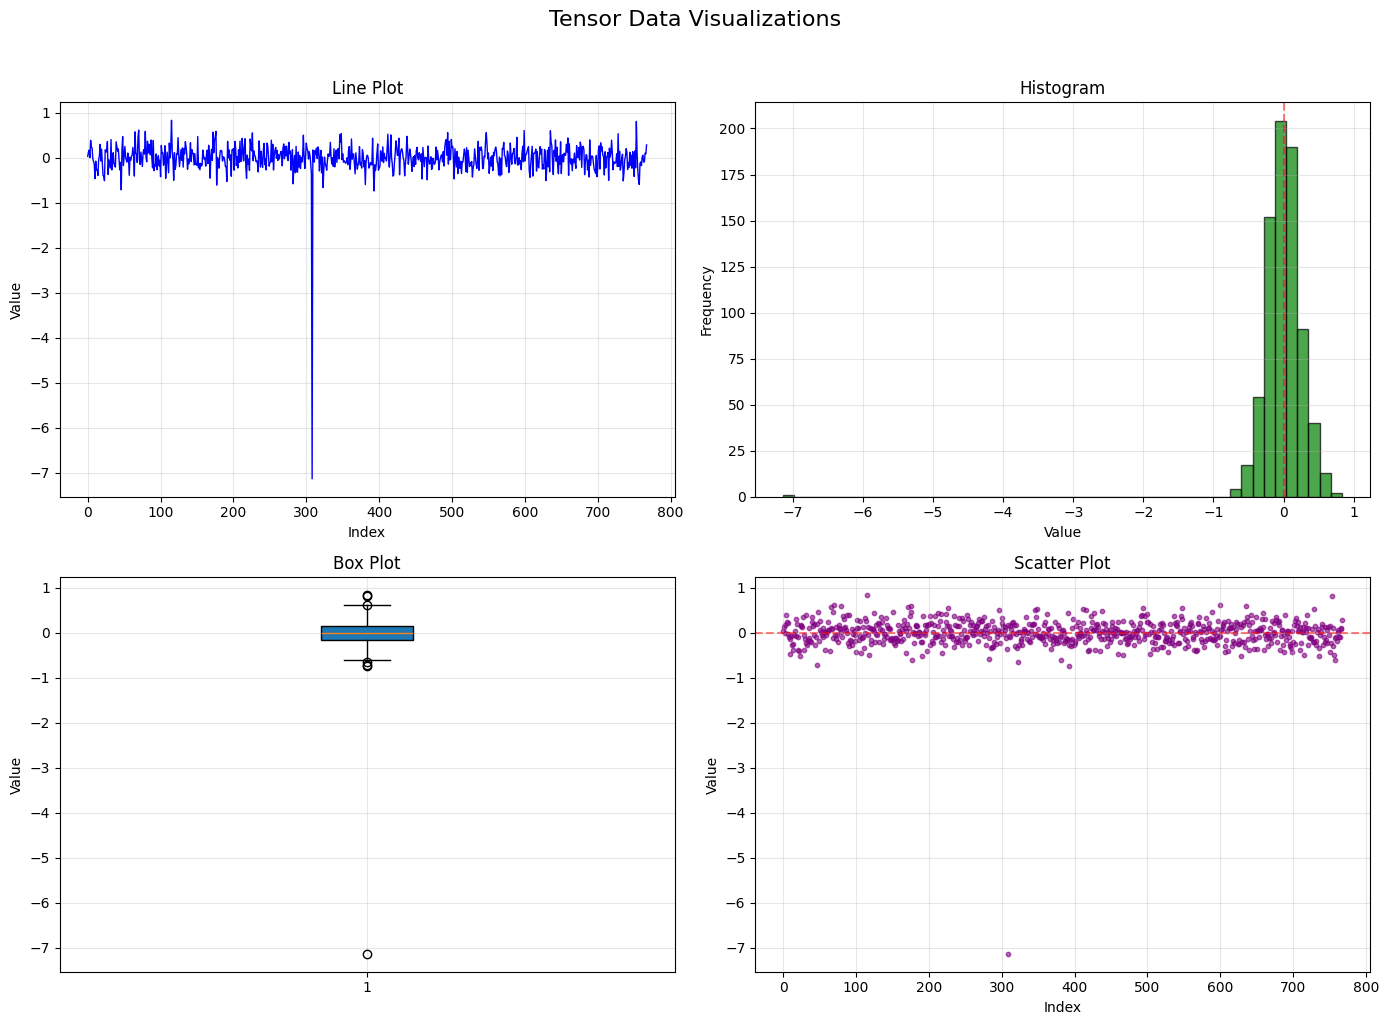

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Line plot
axes[0, 0].plot(tensor_array, linewidth=1, color='blue')
axes[0, 0].set_title('Line Plot')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# Histogram
axes[0, 1].hist(tensor_array, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Histogram')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(x=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].grid(True, alpha=0.3)

# Box plot
axes[1, 0].boxplot(tensor_array, vert=True, patch_artist=True)
axes[1, 0].set_title('Box Plot')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(True, alpha=0.3)

# Scatter plot
indices = np.arange(len(tensor_array))
axes[1, 1].scatter(indices, tensor_array, alpha=0.6, s=10, color='purple')
axes[1, 1].set_title('Scatter Plot')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Tensor Data Visualizations', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Tensor shape: (768,)
Min value: -7.1393
Max value: 0.8346
Mean: -0.0072
Std: 0.3476
Median: 0.0038
Number of positive values: 392
Number of negative values: 376
Number of zeros: 0


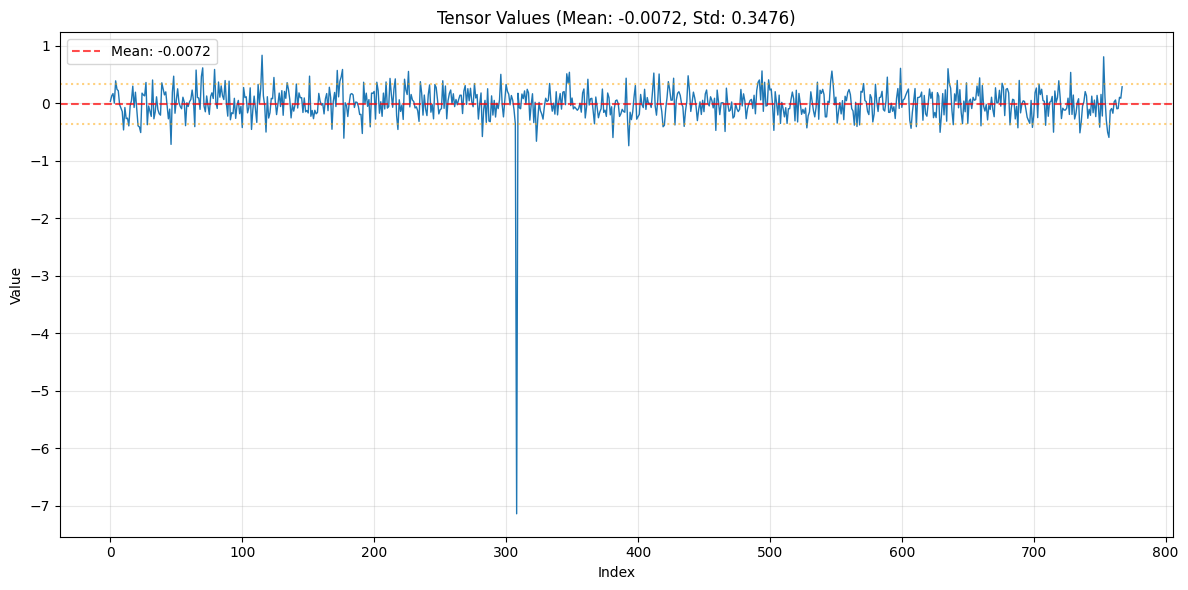

In [23]:
import numpy as np

# Print statistics
print(f"Tensor shape: {tensor_array.shape}")
print(f"Min value: {tensor_array.min():.4f}")
print(f"Max value: {tensor_array.max():.4f}")
print(f"Mean: {tensor_array.mean():.4f}")
print(f"Std: {tensor_array.std():.4f}")
print(f"Median: {np.median(tensor_array):.4f}")
print(f"Number of positive values: {(tensor_array > 0).sum()}")
print(f"Number of negative values: {(tensor_array < 0).sum()}")
print(f"Number of zeros: {(tensor_array == 0).sum()}")

# Plot with statistics annotation
plt.figure(figsize=(12, 6))
plt.plot(tensor_array, linewidth=1)
plt.title(f'Tensor Values (Mean: {tensor_array.mean():.4f}, Std: {tensor_array.std():.4f})')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.axhline(y=tensor_array.mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {tensor_array.mean():.4f}')
plt.axhline(y=tensor_array.mean() + tensor_array.std(), color='orange', linestyle=':', alpha=0.5)
plt.axhline(y=tensor_array.mean() - tensor_array.std(), color='orange', linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 10.9 MB/s eta 0:00:00


In [28]:
from transformers import RagTokenizer, RagRetriever, RagTokenForGeneration

tokenizer = RagTokenizer.from_pretrained("facebook/rag-token-base")
retriever = RagRetriever.from_pretrained("facebook/rag-token-base")
model = RagTokenForGeneration.from_pretrained("facebook/rag-token-base", retriever=retriever)

input_dict = tokenizer.prepare_seq2seq_batch("who holds the record in 100m freestyle", "michael phelps", return_tensors="pt")

outputs = model(input_dict["input_ids"], labels=input_dict["labels"])

loss = outputs.loss

# train on loss

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'BartTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called fr

ImportError: 
CanonicalHFIndex requires the faiss library but it was not found in your environment. Check out the instructions on the
installation page of its repo: https://github.com/facebookresearch/faiss/blob/master/INSTALL.md and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.


In [ ]:
faiss-cpu